In [1]:
#loading the data
import pandas as pd
data = pd.read_csv("C:/Users/Admin/Documents/data/1.04. Real-life example.csv")
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [2]:
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [3]:
data=data.drop(['Model'], axis=1)

In [4]:
data.isnull().sum()*100/len(data)

Brand           0.000000
Price           3.958573
Body            0.000000
Mileage         0.000000
EngineV         3.452244
Engine Type     0.000000
Registration    0.000000
Year            0.000000
dtype: float64

In [5]:
data.dropna(axis=0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 283.0+ KB


In [6]:
data.isnull().sum()*100/len(data)

Brand           0.0
Price           0.0
Body            0.0
Mileage         0.0
EngineV         0.0
Engine Type     0.0
Registration    0.0
Year            0.0
dtype: float64

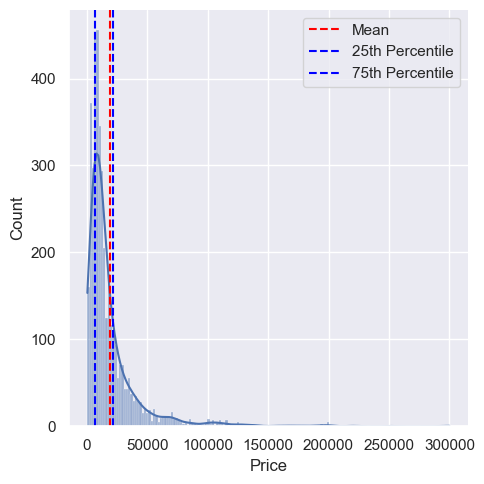

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

sns.displot(data['Price'], kde=True)
plt.axvline(np.mean(data['Price']), color='red', linestyle='--', label='Mean')
plt.axvline(np.percentile(data['Price'], 25), color='blue', linestyle='--', label='25th Percentile')
plt.axvline(np.percentile(data['Price'], 75), color='blue', linestyle='--', label='75th Percentile')
plt.legend()
plt.show()

In [8]:
data['Price'].describe()

count      4025.000000
mean      19552.308065
std       25815.734988
min         600.000000
25%        6999.000000
50%       11500.000000
75%       21900.000000
max      300000.000000
Name: Price, dtype: float64

In [9]:
#Remove the top 2% high priced 
q=data['Price'].quantile(0.98)
data=data[data['Price']<q]

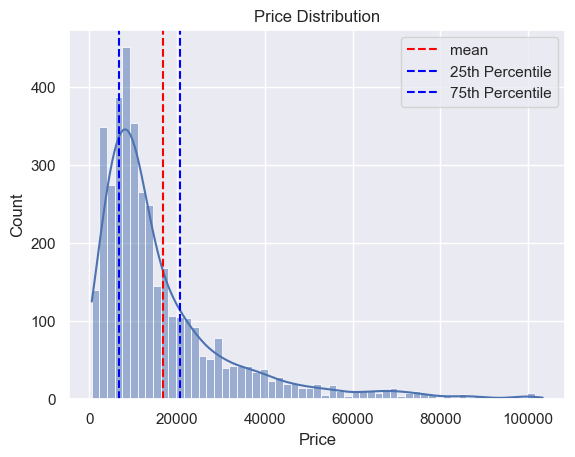

In [10]:
sns.histplot(data['Price'], kde=True)
plt.axvline(np.mean(data['Price']), color='red', linestyle='--', label='mean')
plt.axvline(np.percentile(data['Price'], 25), color='blue', linestyle='--', label='25th Percentile')
plt.axvline(np.percentile(data['Price'], 75), color='blue', linestyle='--', label='75th Percentile')
plt.title('Price Distribution')
plt.legend()
plt.show()

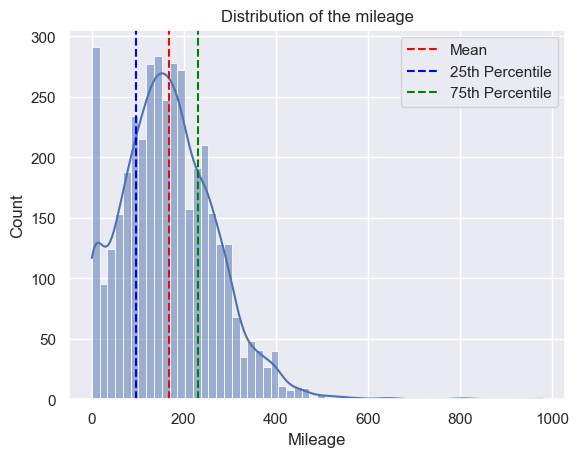

In [11]:
sns.histplot(data['Mileage'], kde=True)
plt.axvline(np.mean(data['Mileage']), color='red', linestyle='--', label='Mean')
plt.axvline(np.percentile(data['Mileage'], 25), color='blue', linestyle='--', label='25th Percentile')
plt.axvline(np.percentile(data['Mileage'], 75), color='green', linestyle='--', label='75th Percentile')
plt.title('Distribution of the mileage')
plt.legend()
plt.show()

In [12]:
data['Mileage'].describe()

count    3943.000000
mean      166.739538
std       102.042365
min         0.000000
25%        95.000000
50%       160.000000
75%       230.000000
max       980.000000
Name: Mileage, dtype: float64

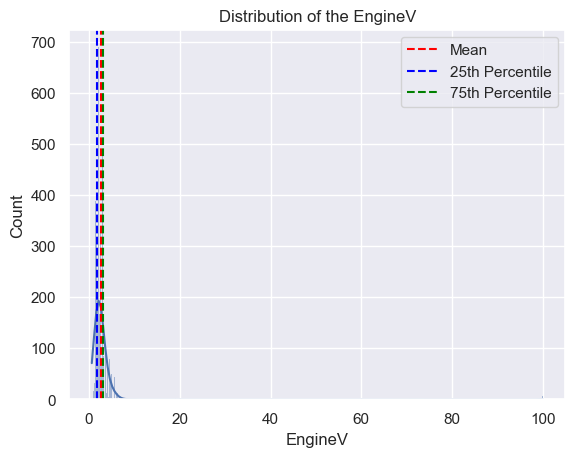

In [13]:
sns.histplot(data['EngineV'], kde=True)
plt.axvline(np.mean(data['EngineV']), color='red', linestyle='--', label='Mean')
plt.axvline(np.percentile(data['EngineV'], 25), color='blue', linestyle='--', label='25th Percentile')
plt.axvline(np.percentile(data['EngineV'], 75), color='green', linestyle='--', label='75th Percentile')
plt.title('Distribution of the EngineV')
plt.legend()
plt.show()

In [14]:
data['EngineV'].describe()

count    3943.000000
mean        2.738415
std         4.980975
min         0.600000
25%         1.800000
50%         2.200000
75%         3.000000
max        99.990000
Name: EngineV, dtype: float64

In [15]:
data=data[data['EngineV']<6.5]


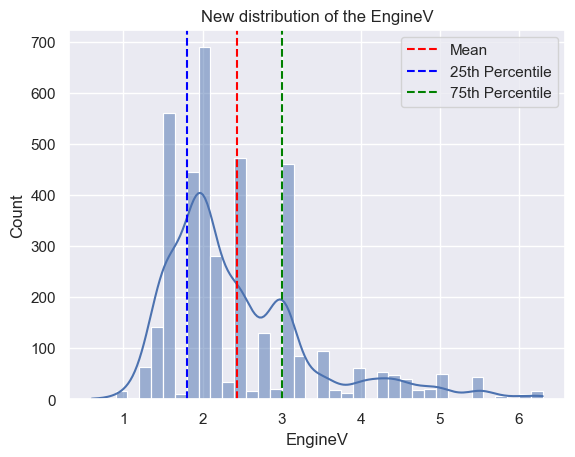

In [16]:
#exclude values exceeding realistic threshold of 6.5 of EngineV
#data=data[data['EngineV']<6.5]

sns.histplot(data['EngineV'], kde=True)
plt.axvline(np.mean(data['EngineV']), color='red', linestyle='--', label='Mean')
plt.axvline(np.percentile(data['EngineV'], 25), color='blue', linestyle='--', label='25th Percentile')
plt.axvline(np.percentile(data['EngineV'], 75), color='green', linestyle='--', label='75th Percentile')
plt.title('New distribution of the EngineV')
plt.legend()
plt.show()

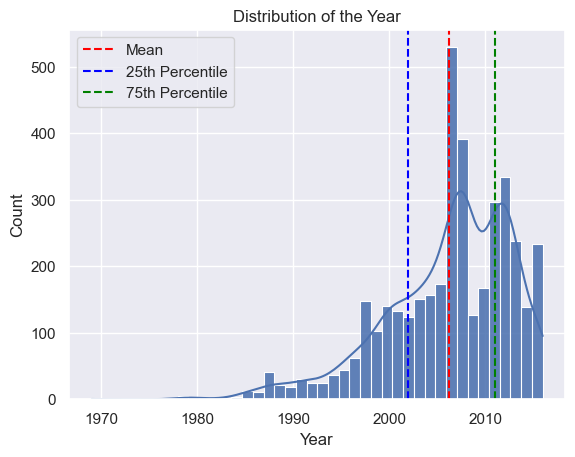

In [17]:
sns.histplot(data['Year'])

sns.histplot(data['Year'], kde=True)
plt.axvline(np.mean(data['Year']), color='red', linestyle='--', label='Mean')
plt.axvline(np.percentile(data['Year'], 25), color='blue', linestyle='--', label='25th Percentile')
plt.axvline(np.percentile(data['Year'], 75), color='green', linestyle='--', label='75th Percentile')
plt.title('Distribution of the Year')
plt.legend()
plt.show()


In [18]:
q = data['Year'].quantile(0.01)
data = data[data['Year']>q]


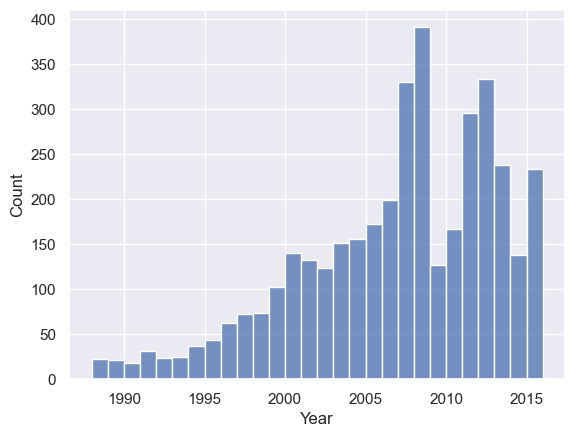

In [20]:
sns.histplot(data['Year'])
plt.show()                       


In [21]:
data.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999
10,Renault,11950.0,vagon,177,1.5,Diesel,yes,2011


In [22]:
data_cleaned=data.reset_index(drop=True)

In [23]:
data_cleaned.describe()


,Price,Mileage,EngineV,Year
count,3864.000000,3864.000000,3864.000000,3864.000000
mean,17086.289884,165.752847,2.441211,2006.526398
std,16384.385551,101.648306,0.946389,6.137422
min,800.000000,0.000000,0.600000,1988.000000
25%,7000.000000,95.000000,1.800000,2003.000000
50%,11500.000000,160.000000,2.200000,2007.000000
75%,20999.250000,230.000000,3.000000,2011.000000
max,103333.000000,980.000000,6.300000,2016.000000


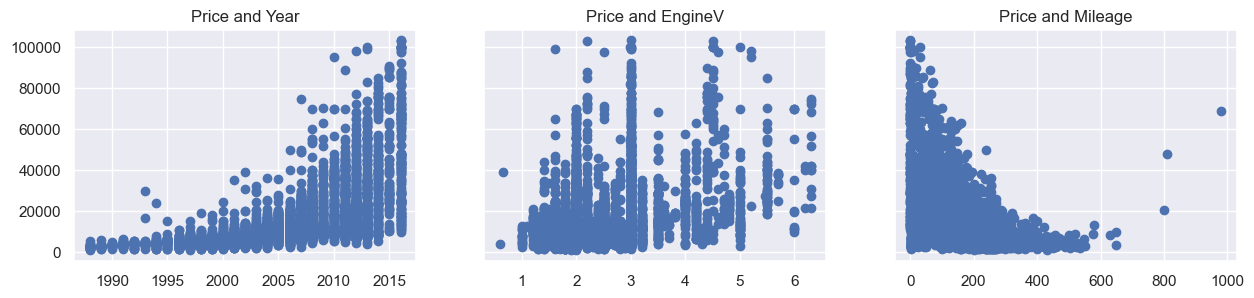

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

In [25]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price

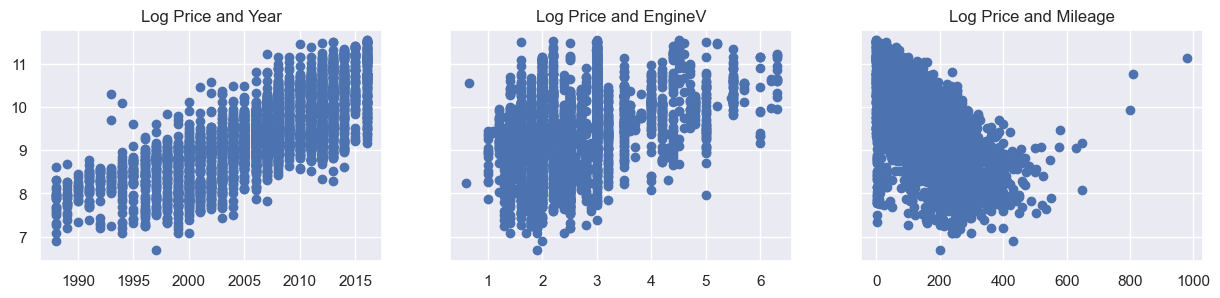

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
plt.show()

In [27]:
data_cleaned=data_cleaned.drop(['Price'], axis=1)

In [30]:
#Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[['Mileage', 'EngineV','Year']]
vif=pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.636711,Mileage
1,7.655968,EngineV
2,10.089535,Year


In [31]:
data=data_cleaned.drop(['Year'], axis=1)

In [32]:
#Dummification
data=pd.get_dummies(data, drop_first=True)

In [33]:
data.columns.values


array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [34]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data= data[cols]

In [36]:
targets=data['log_price']
inputs=data.drop(['log_price'], axis=1)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)
inputs_scaled=scaler.transform(inputs)

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [40]:
#Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [41]:
# Checking the outputs of the regression
y_hat = reg.predict(x_train)

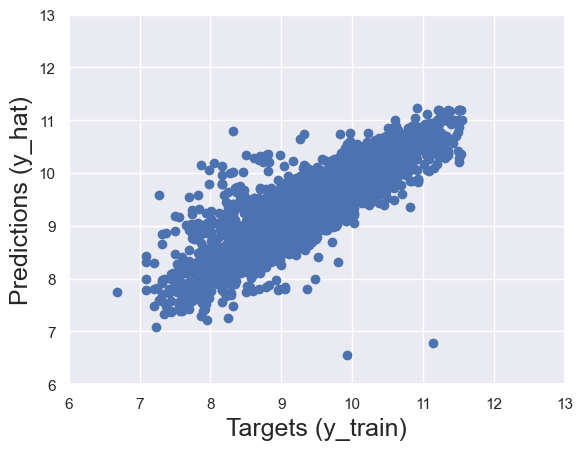

In [42]:
# Comparing the targets (y_train) and the predictions (y_hat)
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [43]:
score =reg.score(x_train,y_train)
intercept =reg.intercept_
coefficents =reg.coef_
print("Score: ",score)
print("Intercept: ",intercept)
print("Coefficents: ",coefficents)

Score:  0.7338270247042242
Intercept:  9.383189795652827
Coefficents:  [-4.37268029e-01  2.07055354e-01  2.31546545e-02  3.19906927e-04
 -1.30922844e-01 -1.79826632e-01 -4.76313854e-02 -8.78508398e-02
 -1.41823493e-01 -1.03609696e-01 -2.02915914e-01 -1.33174684e-01
 -1.71526993e-01 -1.33901549e-01 -3.54028739e-02 -1.47868873e-01
  3.26662953e-01]


In [44]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.437268
1,EngineV,0.207055
2,Brand_BMW,0.023155
3,Brand_Mercedes-Benz,0.000320
4,Brand_Mitsubishi,-0.130923
5,Brand_Renault,-0.179827
6,Brand_Toyota,-0.047631
7,Brand_Volkswagen,-0.087851
8,Body_hatch,-0.141823
9,Body_other,-0.103610


In [45]:
y_hat_test=reg.predict(x_test)

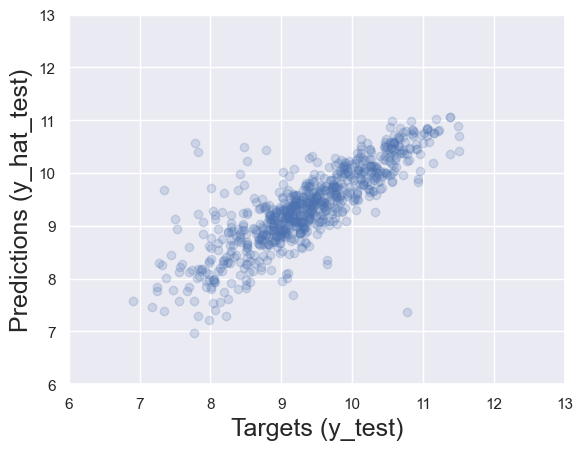

In [46]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [47]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])


In [48]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,11515.413895,NaN
1,34857.335204,7900.0
2,1883.693993,NaN
3,14665.260290,NaN
4,3397.360261,NaN
...,...,...
768,27929.594676,NaN
769,4150.352961,22900.0
770,13985.710294,NaN
771,10113.561828,NaN


In [49]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,11515.413895,16999.0,5483.586105,32.258286
1,34857.335204,24990.0,-9867.335204,39.485135
2,1883.693993,3100.0,1216.306007,39.235678
3,14665.260290,9800.0,-4865.260290,49.645513
4,3397.360261,2800.0,-597.360261,21.334295
...,...,...,...,...
768,27929.594676,25200.0,-2729.594676,10.831725
769,4150.352961,5900.0,1749.647039,29.655035
770,13985.710294,8200.0,-5785.710294,70.557443
771,10113.561828,7300.0,-2813.561828,38.541943
